# Predicting heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a Machine Learning model capable of predicting whwther or not someone has heart disease based on their medical attributes

Approach 
1. Problem definition
2. Data   - from UCI machine learning repository/heat disease data set
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it on Kaggle. 
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy, we'll pursue the project

## Features 

This is where you get fidderent information about each of the features in your data.

**create data dictionary**

age
sex
cp - chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

# Preparing the tools

We're going use pandas, Mathplotlib, and NumPy for data analysis and manipulation


In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plooting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## LOAD DATA

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape #(rows, columns)

(303, 14)

## Data Exploration i.e (Exploratory Data Analysis or EDA)

tHE GOAL HERE IS TO FIND OUT MORE ABout the data and become a subject expert on the dataset youre working with

1. What questions are you trying to solve,
2. What kind of data do we have and how do we treat different types
3. what's missing from the data and how do you deal with it
4. Where are the outliers and why should we care about them? Outliers are sample far away from others
5. How do tou add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

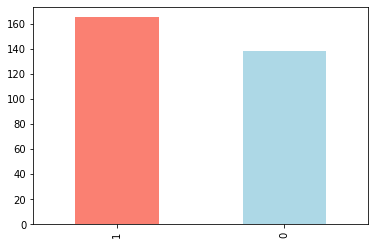

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon", 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Finding patterns

## Heart Disease Fequency according to Sex

In [12]:
df.sex.value_counts()  # 1 = male    0 = female

1    207
0     96
Name: sex, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
# 72 out of 96 women has heart disease. about 75% chance out of 100 that a woman has heart disease;
# 93 out 0f 207 indicated there is heart disease. 
# 

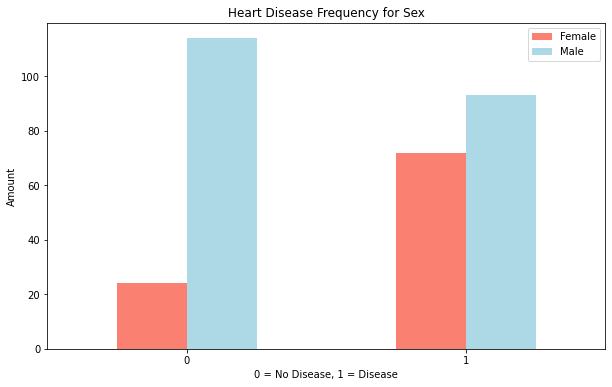

In [15]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

In [16]:
df.head()
#Choose other colunms that stands out to you and see how they relate to the target variable.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df["thalach"].value_counts() #not advisable to do a comparison with, its 91 in length i.e 91 bars in a chart

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Age vs Max Rate for Heart Disease

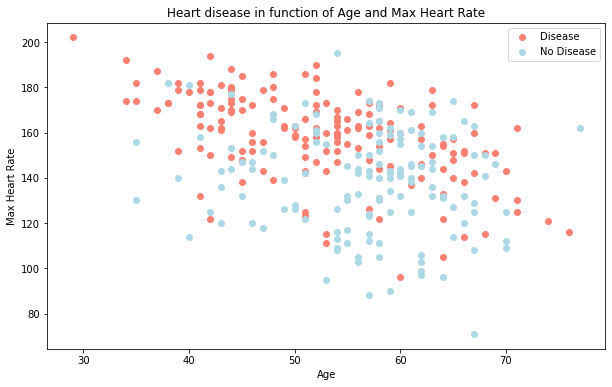

In [18]:
# create another figure
plt.figure(figsize=(10, 6));

#Scatter with positive examples
plt.scatter(df.age[df.target==1], # i.e age coulmn where target=1
           df.thalach[df.target==1],
           c="salmon") 

#Scatter with negative examples
plt.scatter(df.age[df.target==0], # i.e age coulmn where target=0
           df.thalach[df.target==0],
           c="lightblue") ;

# Add a little info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

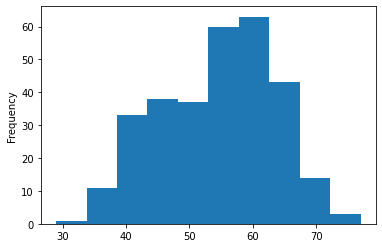

In [19]:
# Check the age distribution with histogram ie. the spread
# this also helps us to check if there are outliers 
df.age.plot.hist();   #this is a normal distrubution. 

### Heart disease frequency with chest pain type

cp = Chest pain type
* 0 - TYpical angina: chezt pain related decrease blood supply to the heart
* 1 - Atypical angina cp not related to heart
* 2 - Non-anginal pain: typically esophageal spasms (non heart related)
* 3 - Asymptomatic: Chest pain not showing signs of disease 

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


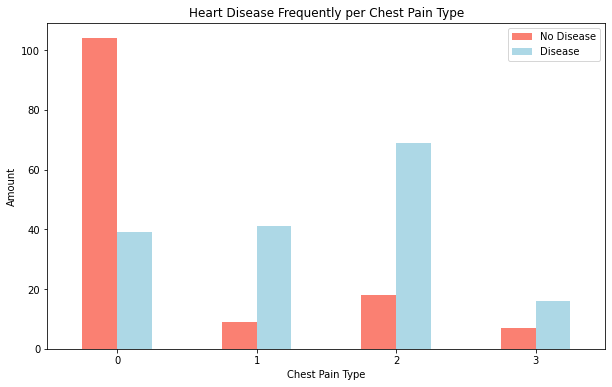

In [21]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=("salmon", "lightblue"))

# Add some communication
plt.title("Heart Disease Frequently per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [22]:
# Make a correlation matrix
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [23]:
import seaborn as sns; sns.set_theme()
sns.set(font_scele=1.5) #increase font size

# Make the correlation matrix a little prettier 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize =(15, 10))
ax = sns.heatmap(corr_matrix, 
                annot=True, 
                linewidths=0.5,
                fmt=".2f", #decimal places
                cmap="YlGnBu"); #color; yellow, green, blue

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

TypeError: set_theme() got an unexpected keyword argument 'font_scele'

# 5. Modelling

In [ ]:
# Split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [ ]:
x

In [ ]:
y

In [ ]:
# split data into train and test sets
np.random.seed(42)

# Split 
x_train, x_test, y_train, y_test = train_test_split(x,
                                                  y,
                                                  test_size=0.2)

In [ ]:
x_train #len(x_train)

In [ ]:
y_train

To build a machine learning model, 

Find patterns on the training set.

Test it (use the patterns) on the test set

We'll be trying 3 different machine learning models:
1. Logistic Regression (can also be used for classification, although the map doesnt depict that. Its a linear model for calssification rather than regression despite its name)
2. K-Nearest Neighbours Classifier 
3. Random Forest Classifier 

In the experiment phase, its good to try different machine learning models

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score model
def fit_and_score(models, x_train, x_test, y_train, y_test):
        """
        Fits and evaluate given Machine Learning Models.
        model : a dict of different Scikit-learn machine learning models
        x_train : training data (no labels)
        x_test : test data (no labels)
        y_train : training labels
        y_train : test labels
        """
        # Set random seed
        np.random.seed(42)
        # Make a list to keep model scores
        model_scores = {}
        # Loop through models
        for name, model in models.items(): #name is thr key, model is the value
            # fit the model to the data 
            model.fit(x_train, y_train)
            # Evaluate the model and apend its score to model_scores
            model_scores[name] = model.score(x_test, y_test)
        return model_scores

In [ ]:
model_scores = fit_and_score(models=models, 
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

### Model Comparison

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar();

In [ ]:
model_compare.T.plot.bar();

### Improving our Model

WE'VE got our baseline model...but model's first prediction isnt awlawys what we should base our next steps on.

Let's look at the following:
* hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision 
* Recall
* F1 score
* Classification report 
* ROC curve
* Area under the curve (AUC)

First to are always part of any classification model while others are peculiar to classification models

## Hpyerparameter tuning

In [ ]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values of n neighbors
neighbors = range (1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors= i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update the training score across list
    train_scores.append(knn.score(x_train, y_train))
    
    # update the test score
    test_scores.append(knn.score(x_test, y_test))

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RamdomizedSearchCV

Tuning 
* Logistic regression
* Random forest classifier

...using RandomizedSearchCV

In [ ]:
# Create hyperparameter for logistic regression 
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, ],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange (1, 20, 2)}

We've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [ ]:
# Tune logisitic regression
np.random.seed(42)

# Setup random hyperparameter search for lofisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(x_train, y_train)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(x_test, y_test)

Tunning RandomForestClassifier()

In [ ]:
np.random.seed(42)

# Setup random hyperparameter grid for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions = rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

In [ ]:
# Evaluate it
rs_rf.score(x_test, y_test)

wE tune parameteres by;

hand

RandomizedSearchCV

GridSearchCV

### Hyperparameter Tunning with GridSearchCV

Since LogisticRegression model provides the best scores so far, we'll try improve them again using GR=ridSearchCV

In [ ]:
# Different hyperparemeters for our LogisticRgression model
log_reg_gris = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisiticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
# Fit grid hyperparemeter search model
gs_log_reg.fit(x_train, y_train);


In [ ]:
# check the best hyperparameter
gs_log_reg.best_params_

In [ ]:
# Evaluate the grid search LogReg model
gs_log_reg.score(x_test, y_test)

In [ ]:
model_scores

## Evaluating our tunned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix 
* Classification report 
* Precision 
* Recall
* F1-score

...use cross-vaidation where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
# Make predictions with tunned model
y_preds = gs_log_reg.predict(x_test)

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
# Plot ROC curve and calculate and AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plots a nice looking matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top -0.5)
    
plot_conf_mat(y_test, y_preds)

"""
a perfect model sld have 0 in the two black boxes. 
Model predicted no desease (4) when there is disease
Model predicted disease (3) when there is no disease 
"""

Getting Validation report, cross-validation, recall anf F1 score

In [ ]:
print (classification_report(y_test, y_preds))

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score, of our model using cross-validation and to do so we'll be using cross_val_score()

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.23357214690901212, 
                        solver = 'liblinear')

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        scoring="accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross_validate Precision
cv_prec = cross_val_score(clf,
                        x,
                        y,
                        scoring="precision")
cv_prec =np.mean(cv_prec)
cv_prec

In [ ]:
# Cross_validate recall
cv_rec = cross_val_score(clf,
                        x,
                        y,
                        scoring="recall")
cv_rec =np.mean(cv_rec)
cv_rec

In [ ]:
# Cross_validate f1
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        scoring="f1")
cv_f1 =np.mean(cv_prec)
cv_f1

In [ ]:
# Visualize cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_rec,
                          "F1": cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title= "Cross-validation classification metrics", legend=False);

### Feature Importance

Feature importance is another way of asking, "which feature contibuted most to the outcomes of the model and how they contribute?"

Finding feature importance is different for each ML model. To find feature importance, search for Model Name feature importance.

Let's find the feature importance for Logistic Regression Model...

In [ ]:
gs_log_reg.best_params_

In [ ]:
clf = LogisticRegression(C= 0.23357214690901212,
                        solver ='liblinear')

clf.fit(x_train, y_train);

In [ ]:
# Check coef_
clf.coef_

In [ ]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
pd.crosstab(df["sex"], df["target"])

In [ ]:
pd.crosstab(df["slope"], df["target"])